In [2]:
import numpy as np
import pandas as pd

# Example of checking correlation matrix
correlation_matrix = pd.DataFrame(X).corr()
print(correlation_matrix)


     0    1
0  1.0  1.0
1  1.0  1.0


In [4]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        """
        Train the model using the Normal Equation with pseudo-inverse
        X: Feature matrix (m x n)
        y: Target vector (m,)
        """
        # Adding a column of ones for the bias term (x_0 = 1)
        X_bias = np.c_[np.ones(X.shape[0]), X]  # Shape: (m, n+1)
        
        # Use pseudo-inverse to handle singular matrix issue
        self.theta = np.linalg.pinv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        """
        Predict the target values for the given feature matrix X
        X: Feature matrix (m x n)
        """
        X_bias = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (x_0 = 1)
        return X_bias @ self.theta  # Matrix multiplication to get predictions

# Example Usage
X = np.array([[1, 2], [3, 4], [5, 6]])  # Example feature data
y = np.array([3, 7, 11])  # Example target data

model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

print("Predictions:", predictions)


Predictions: [ 3.  7. 11.]


In [5]:
import numpy as np

class ScratchLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate  # Learning rate (alpha)
        self.iterations = iterations  # Number of iterations for gradient descent
        self.theta = None  # Parameters for the model
    
    def fit(self, X, y):
        """
        Train the linear regression model using gradient descent.
        X: Feature matrix (m x n)
        y: Target vector (m,)
        """
        m, n = X.shape
        X_bias = np.c_[np.ones(m), X]  # Add a column of ones to X for the bias term
        self.theta = np.zeros(n + 1)  # Initialize theta (n+1 because of the bias term)
        
        # Perform gradient descent
        for _ in range(self.iterations):
            self._gradient_descent(X_bias, y, m)
    
    def _gradient_descent(self, X_bias, y, m):
        """
        Perform one step of gradient descent to update the parameters (theta).
        X_bias: Feature matrix with bias term included (m x n+1)
        y: Target vector (m,)
        m: Number of training examples
        """
        predictions = X_bias.dot(self.theta)  # h(x) = X * theta
        errors = predictions - y
        
        # Update each parameter (theta_j) using the gradient descent rule
        for j in range(len(self.theta)):
            # Gradient calculation for each feature
            gradient = (1 / m) * np.dot(errors, X_bias[:, j])  # sum of (h(x_i) - y_i) * x_j_i
            self.theta[j] -= self.learning_rate * gradient  # Update parameter
    
    def predict(self, X):
        """
        Predict the target values for the given feature matrix X.
        X: Feature matrix (m x n)
        """
        X_bias = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for bias term
        return X_bias.dot(self.theta)  # Predictions h(x) = X * theta

# Example usage
X = np.array([[1, 2], [3, 4], [5, 6]])  # Example feature data (3 samples, 2 features)
y = np.array([3, 7, 11])  # Example target data

model = ScratchLinearRegression(learning_rate=0.01, iterations=1000)

# Train the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

print("Predictions:", predictions)


Predictions: [ 3.01669019  7.00444109 10.99219199]


In [7]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error (MSE) between the true and predicted values.
    
    Parameters:
    y_true (numpy array): Actual target values
    y_pred (numpy array): Predicted target values
    
    Returns:
    float: The MSE value
    """
    m = len(y_true)  # Number of samples
    mse = (1 / m) * np.sum((y_pred - y_true) ** 2)  # MSE formula
    return mse

# Example usage
y_true = np.array([3, 7, 11])  # Example actual values
y_pred = np.array([2.8, 6.9, 11.2])  # Example predicted values

mse_value = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse_value}")


Mean Squared Error: 0.029999999999999905


In [8]:
import numpy as np

class ScratchLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []  # To store the loss values during training
        self.val_loss = []  # To store the validation loss values (if applicable)

    def fit(self, X, y, X_val=None, y_val=None):
        m, n = X.shape
        self.theta = np.zeros(n + 1)  # Initialize theta with zeros (including bias term)
        X_bias = np.c_[np.ones(m), X]  # Add a bias column (intercept term)
        
        # Training loop
        for _ in range(self.iterations):
            # Compute predictions
            predictions = X_bias.dot(self.theta)
            
            # Compute the loss (objective function J)
            loss_value = self.compute_loss(X_bias, y)
            self.loss.append(loss_value)
            
            # Optionally compute validation loss
            if X_val is not None and y_val is not None:
                val_loss_value = self.compute_loss(np.c_[np.ones(X_val.shape[0]), X_val], y_val)
                self.val_loss.append(val_loss_value)
            
            # Perform gradient descent update
            gradient = (1 / m) * X_bias.T.dot(predictions - y)
            self.theta -= self.learning_rate * gradient
    
    def compute_loss(self, X, y):
        m = len(y)
        predictions = X.dot(self.theta)
        return (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    
    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return X_bias.dot(self.theta)


In [9]:
# Example usage of ScratchLinearRegression class

# Sample data (X, y)
X = np.array([[1, 2], [2, 3], [3, 4]])  # Feature matrix (3 samples, 2 features)
y = np.array([3, 6, 9])  # Actual target values

# Instantiate the linear regression model
model = ScratchLinearRegression(learning_rate=0.01, iterations=1000)

# Train the model
model.fit(X, y)

# Make predictions
predictions = model.predict(X)
print("Predictions:", predictions)

# Print the loss at the final iteration
print("Final Training Loss:", model.loss[-1])


Predictions: [3.25605507 6.04961797 8.84318087]
Final Training Loss: 0.015477094447607507


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the House Prices dataset
train_df = pd.read_csv('train.csv')

# Separate the columns into numeric and categorical
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with the median
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].median())

# Fill missing values for categorical columns with the mode (most frequent value)
train_df[categorical_columns] = train_df[categorical_columns].fillna(train_df[categorical_columns].mode().iloc[0])

# Select features (excluding the target column 'SalePrice')
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient descent to converge faster)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [12]:
# Assuming the ScratchLinearRegression class is defined as provided in previous cells
model_scratch = ScratchLinearRegression(learning_rate=0.01, iterations=1000)

# Train the ScratchLinearRegression model
model_scratch.fit(X_train, y_train, X_val=X_val, y_val=y_val)

# Make predictions on the validation set
predictions_scratch = model_scratch.predict(X_val)

# Compute the Mean Squared Error for Scratch model
mse_scratch = mean_squared_error(y_val, predictions_scratch)
print(f"Mean Squared Error (Scratch Implementation): {mse_scratch}")


Mean Squared Error (Scratch Implementation): 803613561.8069522


In [13]:
# Train the LinearRegression model from scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Make predictions on the validation set
predictions_sklearn = model_sklearn.predict(X_val)

# Compute the Mean Squared Error for the scikit-learn model
mse_sklearn = mean_squared_error(y_val, predictions_sklearn)
print(f"Mean Squared Error (Scikit-learn Implementation): {mse_sklearn}")


Mean Squared Error (Scikit-learn Implementation): 5.083425940822553e+27


In [14]:
print(f"Mean Squared Error (Scratch Implementation): {mse_scratch}")
print(f"Mean Squared Error (Scikit-learn Implementation): {mse_sklearn}")


Mean Squared Error (Scratch Implementation): 803613561.8069522
Mean Squared Error (Scikit-learn Implementation): 5.083425940822553e+27


In [15]:
from sklearn.metrics import r2_score

r2_scratch = r2_score(y_val, predictions_scratch)
r2_sklearn = r2_score(y_val, predictions_sklearn)

print(f"R^2 (Scratch Implementation): {r2_scratch}")
print(f"R^2 (Scikit-learn Implementation): {r2_sklearn}")


R^2 (Scratch Implementation): 0.8952308493667501
R^2 (Scikit-learn Implementation): -6.627392112814397e+17


In [16]:
import matplotlib.pyplot as plt

def plot_learning_curve(training_loss, validation_loss):
    """
    Plots the learning curve showing the loss (training and validation) over iterations.
    
    Parameters:
    - training_loss (list): List of loss values recorded during training.
    - validation_loss (list): List of loss values recorded during validation.
    """
    plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', color='blue')
    plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming self.loss and self.val_loss are lists storing loss values during training
# Example: plot_learning_curve(self.loss, self.val_loss)


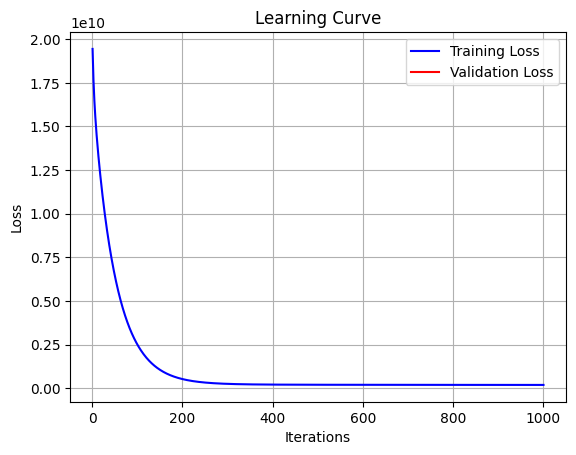

In [18]:
# Assuming ScratchLinearRegression class is defined and loss values are recorded

# Instantiate the model
model = ScratchLinearRegression()

# Train the model (this will populate self.loss and self.val_loss during training)
model.fit(X_train, y_train)

# Now that training is complete, plot the learning curve
plot_learning_curve(model.loss, model.val_loss)


1. The Role of the Bias Term
Intercept Adjustment: The bias term allows the model to shift vertically (in the case of linear regression) or along the axis of the output variable. Without the bias, the model forces the line (or hyperplane) to go through the origin (0,0), which is not suitable for many real-world problems.
Flexibility: Including the bias term enhances the flexibility of the model, allowing it to better fit the data. For instance, if your data does not have an inherent zero-centered relationship between inputs and outputs, the bias term enables the model to adjust accordingly.
2. Impact of Removing the Bias Term
Forcing Zero at the Origin: When (0,0) is removed, the model is forced to go through the origin (0, 0), assuming the relationship between the features and target variable passes through the origin. This can result in a poor fit, especially if the data doesn’t naturally pass through the origin.
Decreased Model Performance: In practice, removing the bias term often leads to worse model performance because it restricts the flexibility of the model. The model may fail to adequately capture the true underlying data distribution, leading to higher error rates.
Bias-Variance Tradeoff: While omitting the bias term might reduce the model's ability to overfit (increasing bias), it also reduces its ability to capture the true relationships in the data (increasing bias). This can worsen the model’s performance overall.
3. Mathematical Implications
The typical linear regression model is defined as will attempt to minimize errors without allowing for any intercept adjustment.
4. Empirical Impact
Training Behavior: Without the bias term, the optimization algorithm (such as gradient descent) will work harder to fit the model. However, since the model is constrained, it may never fully capture the relationships in the data.
Convergence Issues: In practice, the model may require more iterations to converge or may not converge to an optimal solution at all if the data inherently requires a non-zero intercept.
5. Examples and Practical Considerations
In cases like predicting house prices, where the target variable (price) is unlikely to be zero when all feature variables are zero, removing the bias term would produce poor predictions.
For linear models applied to data such as physical measurements or financial data (e.g., predicting revenue based on advertising spend), the bias term often plays a crucial role in aligning predictions with the data’s structure.
6. Conclusion
The bias term in linear regression is a fundamental component that helps the model make more accurate predictions by allowing it to fit the data more flexibly. Removing the bias term forces the model to fit a line that goes through the origin, which can severely limit its ability to model complex relationships and result in poor performance.

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Example: Replace this with your actual dataset
# Assume X is the square footage of houses and y is the price
X = np.array([[1500], [1800], [2400], [3000], [3500]])  # Example feature (square footage)
y = np.array([400000, 450000, 500000, 600000, 650000])  # Example target (price)

# Create polynomial features (e.g., squared, cubed)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1147772218.3143718


In [23]:
import numpy as np

class ScratchLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.alpha = learning_rate  # Learning rate
        self.n_iterations = n_iterations  # Number of iterations for gradient descent
        self.theta = None  # Parameters (weights)
        
    def fit(self, X, y):
        m = len(y)  # Number of training samples
        X_bias = np.c_[np.ones(m), X]  # Add bias term (x0 = 1 for each example)
        
        # Initialize parameters to zero
        self.theta = np.zeros(X_bias.shape[1])
        
        # Gradient Descent
        for _ in range(self.n_iterations):
            # Compute the prediction
            predictions = self.predict(X)
            
            # Calculate the errors (difference between predictions and actual values)
            errors = predictions - y
            
            # Compute the gradient for each parameter (theta_j)
            gradients = (1 / m) * X_bias.T.dot(errors)
            
            # Update the parameters (weights)
            self.theta -= self.alpha * gradients
            
            # Optionally, you can calculate and print loss during training
            if _ % 100 == 0:  # Print every 100 iterations
                loss = self.loss(X, y)
                print(f"Iteration {_}, Loss: {loss}")
    
    def predict(self, X):
        X_bias = np.c_[np.ones(X.shape[0]), X]  # Add bias term (x0 = 1 for each example)
        return X_bias.dot(self.theta)  # Return the dot product of X and theta (predictions)
    
    def loss(self, X, y):
        predictions = self.predict(X)
        m = len(y)
        return (1 / (2 * m)) * np.sum((predictions - y) ** 2)  # Mean squared error (MSE)

# Example usage
if __name__ == "__main__":
    # Example data (simple linear relationship)
    X = np.array([[1], [2], [3], [4], [5]])  # Feature (e.g., square footage)
    y = np.array([1, 2, 3, 4, 5])  # Target (e.g., house prices)
    
    # Create an instance of the model
    model = ScratchLinearRegression(learning_rate=0.01, n_iterations=1000)
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions
    predictions = model.predict(X)
    print("Predictions:", predictions)


Iteration 0, Loss: 4.2769
Iteration 100, Loss: 0.004279170600537284
Iteration 200, Loss: 0.0030507177443470433
Iteration 300, Loss: 0.0021749258751105247
Iteration 400, Loss: 0.0015505539871692496
Iteration 500, Loss: 0.0011054251065012865
Iteration 600, Loss: 0.0007880826312370147
Iteration 700, Loss: 0.0005618419827854006
Iteration 800, Loss: 0.00040054989300392617
Iteration 900, Loss: 0.00028556110383573
Predictions: [1.03425405 2.02113149 3.00800893 3.99488637 4.9817638 ]


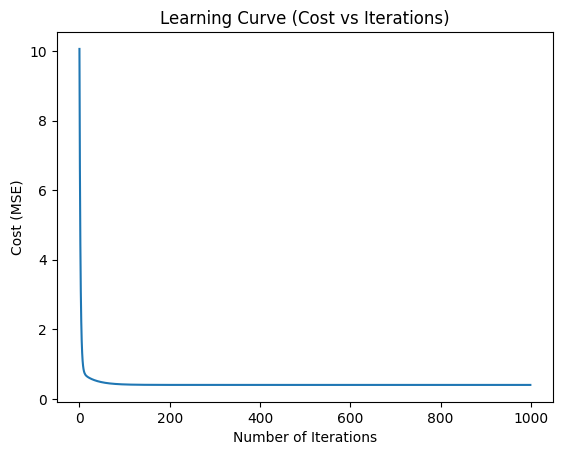

Optimal parameters (theta): [[4.21509609]
 [2.77011344]]


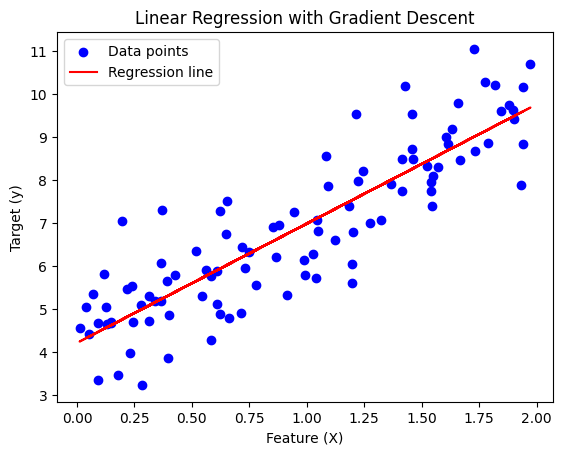

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for simple linear regression
np.random.seed(42)
m = 100  # Number of data points
X = 2 * np.random.rand(m, 1)  # Feature values between 0 and 2
y = 4 + 3 * X + np.random.randn(m, 1)  # Target values with some noise

# Add a column of ones to X to account for the bias term (theta_0)
X_bias = np.c_[np.ones((m, 1)), X]  # Shape (m, 2) now

# Gradient Descent implementation
def compute_cost(X, y, theta):
    """Compute the Mean Squared Error (MSE) cost function."""
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, learning_rate=0.1, n_iterations=1000):
    """Perform gradient descent to learn theta."""
    m = len(y)
    cost_history = []

    for iteration in range(n_iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

# Initialize theta parameters (theta_0 and theta_1)
theta_init = np.random.randn(2, 1)

# Perform gradient descent to fit the model
theta_optimal, cost_history = gradient_descent(X_bias, y, theta_init)

# Plot the cost function during the iterations (learning curve)
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Learning Curve (Cost vs Iterations)')
plt.show()

# Show the learned parameters (theta)
print("Optimal parameters (theta):", theta_optimal)

# Plot the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_bias.dot(theta_optimal), color='red', label='Regression line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()
